In [14]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
import sklearn
from __future__ import print_function
import librosa
import numpy as np
import matplotlib.pyplot as plt
from librosa import display,core
from dtw import dtw
from numpy import linalg as LA
from math import sqrt
from scipy import stats
from sklearn import svm
from sklearn.svm import SVR
from mlxtend.plotting import plot_decision_regions
import matplotlib.patches as mpatches
from sklearn.model_selection import cross_val_predict, cross_val_score,cross_validate
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import time
from sklearn.model_selection import StratifiedKFold

from collections import Counter

from imblearn.over_sampling import RandomOverSampler
#%matplotlib inline

# Link
https://www.researchgate.net/post/How_can_I_select_13_MFCC_coefficients

# K-NN Classifier

## createTrainingData()
##### returns a training data set and labels
- Calculates MFCC's for the two audio signals, American(0) and Indian(1).
- The first MFCC feature is discareded.
- The K-NN classifier takes vectors which have 19 features of the 5th frame of the audio signal.

In [2]:
def createTrainingData(start, end):
    samples = []
    l1=[376,248,251]
    l2=[334,339,294]
     
    '''a,s=librosa.load("C:\\Users\\Dell\\Desktop\\appa.m4a")
    mfcc1= librosa.feature.mfcc(y=a,sr=s)
    newind=[]
    concatfeatures(newind,mfcc1)
    newind=np.asarray(newind)
    #for v in range(10):
    samples.append([newind[0],1))'''
   # print(newind[0])
    for q,r in zip (l1,l2):
       
        for i in range(1,10):
            ind=0
            am=0
            try: 
                a,s=librosa.load("../Indian/p"+str(q)+"_00"+str(i)+".wav")
            except:
                ind=1
            try:
                b,t=librosa.load("../American/p"+str(r)+"_00"+str(i)+".wav")
            except:
                am=1
            if(ind==0 and am==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp1=mfcc1.T[1][start:end]
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp1,1])
                samples.append([temp2,0])              
                print('*', end=' ')
                
            elif(ind==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                temp1=mfcc1.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                samples.append([temp1,1])            
                print('$', end=' ')
            elif(am==0):
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp2,0])            
                print('#', end=' ')
            else: continue
        print('\n')
        for i in range(10,100):
            ind=0
            am=0
            try: 
                a,s=librosa.load("../Indian/p"+str(q)+"_0"+str(i)+".wav")
            except:
                ind=1
            try:
                b,t=librosa.load("../American/p"+str(r)+"_0"+str(i)+".wav")
            except:
                am=1
            if(ind==0 and am==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp1=mfcc1.T[1][start:end]
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp1,1])
                samples.append([temp2,0])              
                print('*', end=' ')
                
            elif(ind==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                temp1=mfcc1.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                samples.append([temp1,1])            
                print('$', end=' ')
            elif(am==0):
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp2,0])            
                print('#', end=' ')
            else: continue
        print('\n')
        for i in range(100,430):
            ind=0
            am=0
            try: 
                a,s=librosa.load("../Indian/p"+str(q)+"_"+str(i)+".wav")
            except:
                ind=1
            try:
                b,t=librosa.load("../American/p"+str(r)+"_"+str(i)+".wav")
            except:
                am=1
            if(ind==0 and am==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp1=mfcc1.T[1][start:end]
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp1,1])
                samples.append([temp2,0])              
                print('*', end=' ')
                
            elif(ind==0):
                mfcc1= librosa.feature.mfcc(y=a,sr=s)
                temp1=mfcc1.T[1][start:end]
                for frame in range(10,50):
                    temp1=np.concatenate((temp1,mfcc1.T[frame][start:end]))
                samples.append([temp1,1])            
                print('$', end=' ')
            elif(am==0):
                mfcc2= librosa.feature.mfcc(y=b,sr=t)
                temp2=mfcc2.T[1][start:end]
                for frame in range(10,50):
                    temp2=np.concatenate((temp2,mfcc2.T[frame][start:end]))
                samples.append([temp2,0])            
                print('#', end=' ')
            else: continue
        print('\n')
   
    print(len(samples))
    X = [i[0] for i in samples]
    Y = [j[1] for j in samples]
    return X,Y

def concatfeatures(realdata, mfcc1):
    temp1=mfcc1.T[1][1:19]
    for frame in range(10,50):
        temp1=np.concatenate((temp1,mfcc1.T[frame][1:19]))
    #print(temp1)
    realdata.append(temp1)
    
def concatfeatures1(realdata, mfcc1):
    temp1=mfcc1.T[1][1:13]
    for frame in range(10,50):
        temp1=np.concatenate((temp1,mfcc1.T[frame][1:13]))
    #print(temp1)
    realdata.append(temp1)

## createTest(start, end)
###### returns a testing dataset and the correct labels

- Creates a data set of length (end-start)
- Returns the actual labels to calculate accuracy

In [3]:
data , labels = createTrainingData(1,19)
X_train, X_test, y_train, y_test  = train_test_split(data,labels)

* * * * * * * * * 

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * # * * * * * * * * * * * * * * # * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * $ * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * # * * * * * * * * * * * * * * # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

* * * * * * * * * 

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

In [4]:
def predict(X,Y,Z):
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X,Y)
    prediction = knn.predict(Z)
    scores = cross_val_score(knn,data,labels)
    print(scores.mean())
    return (prediction)

def printPrediction(prediction,actual_label):
    print("1 -> Indian, 0-> American\n")
    for i in range(len(prediction)):
        print("Actual ->",actual_label[i]," Prediction ->",prediction[i])

def accuracy(prediction,actual):
    count=0
    l=len(prediction)
    for i in range(l):
        if(prediction[i]==actual[i]):
            count+=1
    return count/l*100

### After Oversampling

In [5]:
Counter(labels)

Counter({0: 1269, 1: 1032})

In [6]:
X_train, X_test, y_train, y_test  = train_test_split(data,labels)
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 950), (1, 950)]


In [15]:
s= time.time()
pred = predict(X_resampled,y_resampled,X_test)
#printPrediction(prediction,y_train)
print(time.time()-s)
e = accuracy(pred,y_test)
print("\nAccuracy:",e)

/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.7974793568013907
5.223753929138184

Accuracy: 91.31944444444444


In [8]:
confusion_matrix(y_test, pred)

array([[293,  26],
       [ 24, 233]])

In [9]:
(tn, fp), (fn, tp) = confusion_matrix(y_test,pred)
(tn, fp, fn, tp)

(293, 26, 24, 233)

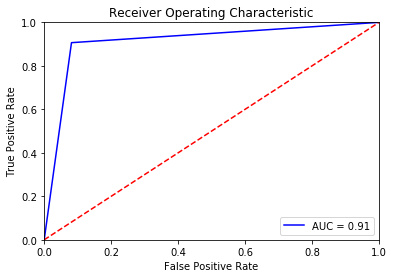

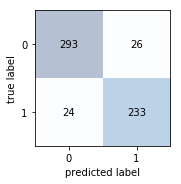

In [10]:
def plotCurve(y_test1,y_pred,name):   
    fpr, tpr, thresholds = metrics.roc_curve(y_test1, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    name = '../'+name+'.png'
    plt.savefig(name)
    plt.show()
    return roc_auc
auc = plotCurve(y_test,pred,'knn-aoc')

binary = confusion_matrix(y_test,pred)
fig, ax = plot_confusion_matrix(conf_mat=binary)
n = '../knn.png'
plt.savefig(n)
plt.show()

In [11]:
precision = round(tp/(tp+fp),4)
recall = round(tp/(tp+fn),4)
fmeasure = round(2*((precision*recall)/(precision+recall)),4)
rej = round(tn/(tn+fp),4)
acc = round((tn+tp)/(tn+tp+fp+fn),4)

In [12]:
print(precision,recall,fmeasure,rej,acc)

0.8996 0.9066 0.9031 0.9185 0.9132


In [13]:
knn = KNeighborsClassifier(5)
scores = cross_val_score(knn, data, labels, cv=10, scoring='f1_macro')
scores.mean(),scores.std()                                             

(0.9044808824968541, 0.055170922163789916)